In [1]:
!pip install tweety-ns

In [2]:
from tweety import Twitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from credentials import username_t, password_t

pd.set_option('display.max_columns', None)

In [3]:
class TwitterScraper:
  def __init__(self, username: str, password: str, target: str):
    self.target     = target

    # init session
    self.app        = Twitter("session")
    self.app.start(username, password)
    self.app.sign_in(username, password)

    self.keys = []
    self.df = pd.DataFrame()

  def get_all_keys(self, data):
    keys = set()
    def extract_keys(obj, prefix=""):
      for key, value in obj.items():
        full_key = f"{prefix}.{key}" if prefix else key
        if not isinstance(value, dict):
          keys.add(full_key)
        if isinstance(value, dict):
          extract_keys(value, prefix=full_key)
    for item in data:
      if isinstance(item, dict):
        extract_keys(item)
    self.keys = list(keys)
    return
  def createDataFrame(self, data, keys):
    result_dict = {key: [] for key in keys}
    for item_ in data:
      for key in keys:
        splitted = key.split(".")
        current_value = item_
        try:
          for part in splitted:
            if current_value is not None and part in current_value:
              current_value = current_value[part]
            else:
              current_value = None
              break
          result_dict[key].append(current_value)
        except TypeError:
          result_dict[key].append(None)
    return result_dict

  def processTweets(self, tweets_arr):
    if not self.keys:
      self.get_all_keys(tweets_arr)
    data_df = self.createDataFrame(tweets_arr, self.keys)
    return pd.DataFrame(data_df)

  def joinToDataFrame(self, df_t):
    if self.df.empty:
      self.df = df_t
    else:
      self.df = pd.concat([self.df, df_t], axis=0, ignore_index=True)

  def downloadTargetTweets(self, pages=1, join: bool = True, returnIt:bool=False):
    user = self.app.get_user_info(self.target)
    user_tweets = self.app.get_tweets(user, pages=pages)
    processed = self.processTweets(user_tweets)
    self.joinToDataFrame(processed)
    if returnIt:
      return processed
    return

  def downloadTopicTweets(self, topic: str, pages: int = 1, join:bool=True, returnIt:bool=False):
    lookout = self.app.search(topic, pages=pages)
    processed = self.processTweets(lookout)
    self.joinToDataFrame(processed)
    if returnIt:
      return processed
    return

## Claudia Sheinbaum

In [4]:
target_t    = "Claudiashein"

cla_tts = TwitterScraper(username_t, password_t, target_t)

In [5]:
cla_tts.downloadTargetTweets()
cla_tts.downloadTopicTweets("Claudia Sheinbaum")

In [6]:
cla_tts.df.head()

,author.followers_count,author.community_role,retweeted_tweet,community_note,place,url,rich_text.hashtags,urls,author.can_dm,voice_info,author.notifications,language,id,author.has_custom_timelines,author.profile_interstitial_type,tweet_body,quoted_tweet,community,author.entities.description.urls,author.screen_name,author.friends_count,author.translator_type,media,author.statuses_count,author.normal_followers_count,rich_text.media,created_on,rich_text.urls,is_sensitive,is_retweeted,author.date,is_quoted,author.pinned_tweets,rich_text.text,author.is_translator,likes,bookmark_count,source,replied_to,broadcast,author.description,author.profile_image_url_https,quote_counts,text,author.rest_id,author.created_at,date,rich_text,author.username,edit_control.latest_tweet_id,symbols,author.profile_url,can_reply,edit_control.is_edit_eligible,author.media_count,threads,is_reply,author.bio,is_space,hashtags,is_retweet,reply_counts,pool,author.verified,is_liked,audio_space_id,author.id,user_mentions,rich_text.id,author.listed_count,author.is_blocked,author.name,retweet_counts,comments,author.notifications_enabled,rich_text.tags,author.following,edit_control.is_latest,author.possibly_sensitive,has_moderated_replies,edit_control.edits_remaining,views,has_newer_version,author.favourites_count,rich_text.symbols,edit_control.tweet_ids,author.profile_banner_url,author.fast_followers_count,author.location,vibe,rich_text.user_mentions,author.protected
0,2829234,None,None,None,None,https://twitter.com/Claudiashein/status/176153...,[],[],True,None,False,es,1761532057119830400,True,None,El día de hoy he estado recibiendo llamadas si...,None,None,[],Claudiashein,1653,none,"[{'display_url': 'pic.twitter.com/nCFXF5f7lc',...",34097,2829234,[],2024-02-24 23:22:24+00:00,[],False,False,2012-05-26 21:48:47+00:00,False,None,El día de hoy he estado recibiendo llamadas si...,False,10417,225,Twitter for iPhone,None,None,"Científica, humanista, experta en cambio climá...",https://pbs.twimg.com/profile_images/165818582...,1178,El día de hoy he estado recibiendo llamadas si...,591361197,2012-05-26 21:48:47+00:00,2024-02-24 23:22:24+00:00,"{'tags': [], 'id': 'Tm90ZVR3ZWV0OjE3NjE1MzIwNT...",Claudiashein,1761532057119830400,[],https://twitter.com/Claudiashein,True,True,15392,[],False,"Científica, humanista, experta en cambio climá...",False,[],False,8327,None,True,False,None,591361197,[],Tm90ZVR3ZWV0OjE3NjE1MzIwNTcwMzE3NDU1MzY=,2993,False,Dra. Claudia Sheinbaum,3506,[],False,[],False,True,False,False,5,1241924,False,1751,[],[1761532057119830400],https://pbs.twimg.com/profile_banners/59136119...,0,Ciudad de México,,[],False
1,2829234,None,None,None,None,https://twitter.com/Claudiashein/status/176152...,None,[],True,None,False,es,1761529574804930656,True,None,"El día de hoy estoy trabajando desde casa, afi...",None,None,[],Claudiashein,1653,none,"[{'display_url': 'pic.twitter.com/JE5fPMHfRK',...",34097,2829234,None,2024-02-24 23:12:32+00:00,None,False,False,2012-05-26 21:48:47+00:00,False,None,None,False,5577,27,Twitter for iPhone,None,None,"Científica, humanista, experta en cambio climá...",https://pbs.twimg.com/profile_images/165818582...,115,"El día de hoy estoy trabajando desde casa, afi...",591361197,2012-05-26 21:48:47+00:00,2024-02-24 23:12:32+00:00,None,Claudiashein,1761529574804930656,[],https://twitter.com/Claudiashein,True,True,15392,[],False,"Científica, humanista, experta en cambio climá...",False,[],False,1290,None,True,False,None,591361197,[],None,2993,False,Dra. Claudia Sheinbaum,1698,[],False,None,False,True,False,False,5,195252,False,1751,None,[1761529574804930656],https://pbs.twimg.com/profile_banners/59136119...,0,Ciudad de México,,None,False
2,2829234,None,None,None,None,https://twitter.com/Claudiashein/status/176151...,None,[],True,None,False,es,1761512558064709935,True,None,Se acerca el día de nuestro gran inicio de cam...,None,None,[],Claudiashein,1653,none,"[{'display_url': 'pic.twitter.com/y522Fvqfwg',...",34097,2829234,None,2024-02-24 22:04:55+0

## Xochitl Galvez

In [7]:
target_t    = "XochitlGalvez"
xo_tts = TwitterScraper(username_t, password_t, target_t)
xo_tts.downloadTargetTweets()
xo_tts.downloadTopicTweets("Xóchitl Gálvez")

In [8]:
xo_tts.df.head()

,quoted_tweet.can_reply,author.followers_count,author.community_role,retweeted_tweet,community_note,place,quoted_tweet.is_retweeted,broadcast.url,broadcast.broadcaster_name,quoted_tweet.author.date,quoted_tweet.author.protected,url,quoted_tweet.author.created_at,quoted_tweet.text,rich_text.hashtags,quoted_tweet.author.is_blocked,quoted_tweet.author.description,quoted_tweet.author.statuses_count,urls,quoted_tweet.author.id,quoted_tweet.community_note,author.can_dm,voice_info,author.notifications,quoted_tweet.quote_counts,language,quoted_tweet.author.fast_followers_count,id,author.has_custom_timelines,author.profile_interstitial_type,tweet_body,quoted_tweet.edit_control.is_edit_eligible,broadcast.title,quoted_tweet.author.normal_followers_count,quoted_tweet,community,author.entities.description.urls,quoted_tweet.author.possibly_sensitive,quoted_tweet.vibe,author.screen_name,author.friends_count,quoted_tweet.author.screen_name,quoted_tweet.language,author.translator_type,quoted_tweet.author.has_custom_timelines,media,quoted_tweet.author.entities.description.urls,quoted_tweet.author.can_dm,quoted_tweet.author.entities.url.urls,quoted_tweet.media,author.statuses_count,author.normal_followers_count,rich_text.media,quoted_tweet.retweet_counts,created_on,quoted_tweet.author.media_count,quoted_tweet.rich_text,quoted_tweet.is_space,rich_text.urls,quoted_tweet.replied_to,quoted_tweet.likes,is_sensitive,quoted_tweet.pool,is_retweeted,broadcast.user_id,author.date,is_quoted,broadcast.username,author.pinned_tweets,rich_text.text,author.is_translator,likes,broadcast.media_key,quoted_tweet.has_newer_version,bookmark_count,quoted_tweet.author.rest_id,source,quoted_tweet.has_moderated_replies,quoted_tweet.retweeted_tweet,quoted_tweet.hashtags,quoted_tweet.edit_control.tweet_ids,quoted_tweet.edit_control.is_latest,replied_to,quoted_tweet.author.profile_image_url_https,broadcast,author.description,quoted_tweet.author.is_translator,broadcast.height,author.profile_image_url_https,quote_counts,broadcast.thumbnail_small,text,quoted_tweet.is_retweet,broadcast.thumbnail_large,author.rest_id,quoted_tweet.date,quoted_tweet.place,author.created_at,broadcast.thumbnail_x_large,date,quoted_tweet.bookmark_count,rich_text,quoted_tweet.source,broadcast.thumbnail_original,author.username,quoted_tweet.id,quoted_tweet.author.translator_type,quoted_tweet.created_on,quoted_tweet.url,quoted_tweet.author.community_role,edit_control.latest_tweet_id,quoted_tweet.author.location,quoted_tweet.edit_control.latest_tweet_id,symbols,quoted_tweet.author.pinned_tweets,quoted_tweet.author.profile_interstitial_type,author.profile_url,can_reply,quoted_tweet.author.notifications,broadcast.source,quoted_tweet.is_sensitive,quoted_tweet.author.followers_count,edit_control.is_edit_eligible,quoted_tweet.author.profile_url,quoted_tweet.tweet_body,quoted_tweet.is_reply,quoted_tweet.edit_control.edits_remaining,quoted_tweet.author.verified,author.media_count,threads,is_reply,quoted_tweet.comments,author.bio,is_space,hashtags,quoted_tweet.community,is_retweet,broadcast.broadcaster_username,quoted_tweet.author.favourites_count,quoted_tweet.user_mentions,broadcast.state,quoted_tweet.broadcast,reply_counts,pool,quoted_tweet.quoted_tweet,author.verified,is_liked,audio_space_id,author.id,user_mentions,broadcast.id,quoted_tweet.symbols,rich_text.id,author.listed_count,author.is_blocked,quoted_tweet.reply_counts,broadcast.broadcaster_id,author.name,retweet_counts,quoted_tweet.author.username,broadcast.media_id,comments,author.notifications_enabled,quoted_tweet.author.bio,quoted_tweet.author.profile_banner_url,rich_text.tags,quoted_tweet.views,quoted_tweet.voice_info,author.following,edit_control.is_latest,author.possibly_sensitive,has_moderated_replies,edit_control.edits_remaining,quoted_tweet.author.notifications_enabled,views,has_newer_version,quoted_tweet.author.name,author.favourites_count,rich_text.symbols,quoted_tweet.is_quoted,quoted_tweet.author.friends_count,quoted_tweet.author.following,

## Analysis

In [9]:
numeric_user_info = ["author.followers_count", "author.normal_followers_count", "author.friends_count", "author.favourites_count", "author.statuses_count", "author.media_count", "author.listed_count"]
numeric_cols_per_tweet = ["views", "retweet_counts", "quote_counts", "bookmark_count", "reply_counts", "likes"]

In [11]:
df_cla = cla_tts.df
df_xo = xo_tts.df
for col in numeric_user_info + numeric_cols_per_tweet:
  df_cla[col] = pd.to_numeric(df_cla[col], errors="coerce")
  df_xo[col] = pd.to_numeric(df_xo[col], errors="coerce")

In [12]:
cla_vals = []
xo_vals = []
for col in numeric_cols_per_tweet:
  cla_vals.append(df_cla[(df_cla["author.username"] == "Claudiashein")][col].sum())
  xo_vals.append(df_xo[(df_xo["author.username"] == "XochitlGalvez")][col].sum())

In [13]:
barWidth = 0.25
br1 = np.arange(len(cla_vals))
br2 = [x + barWidth for x in br1]

In [14]:
print(cla_vals)
print(xo_vals)

[5081819, 36359, 3542, 862, 32585, 99839]
[3238260, 72672, 3247, 1033, 25174, 205249]


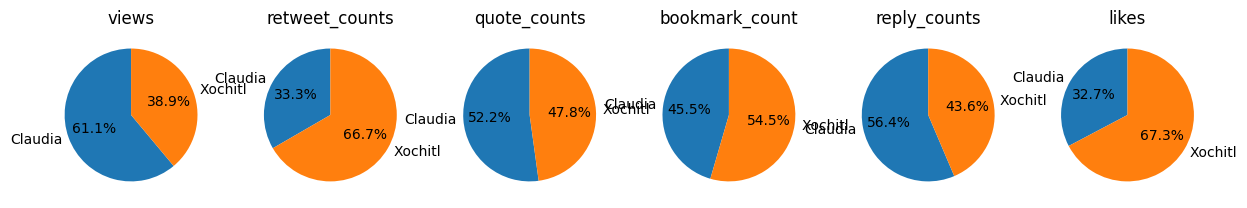

In [15]:
fig, axs = plt.subplots(1, len(cla_vals), figsize=(15, 5))

for i in range(len(cla_vals)):
    labels = ['Claudia', 'Xochitl']
    values = [cla_vals[i], xo_vals[i]]
    axs[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{numeric_cols_per_tweet[i]}')

plt.show()

In [17]:
clau_bio = df_cla[(df_cla["author.username"] == "Claudiashein")].iloc[[0]][numeric_user_info].to_numpy()[0]
xo_bio = df_xo[(df_xo["author.username"] == "XochitlGalvez")].iloc[[0]][numeric_user_info].to_numpy()[0]

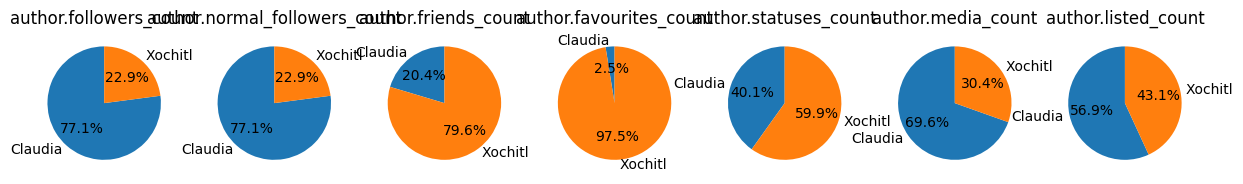

In [19]:
fig, axs = plt.subplots(1, len(clau_bio), figsize=(15, 5))

for i in range(len(clau_bio)):
    labels = ['Claudia', 'Xochitl']
    values = [clau_bio[i], xo_bio[i]]
    axs[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{numeric_user_info[i]}')

plt.show()